# Импорт бибилотек

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import f1_score, RocCurveDisplay, mean_squared_error

# Загрузка данных

In [2]:
train = pd.read_csv('../data/processed/train.csv')

In [3]:
train

,customer_id,date_diff_post,buy_post,startdatetime,ownareaall_sqm,format_name,MaxMinDelta,OrderPrice,MeanOrderPrice,FavoriteDish,hour,minute,is_food_court,is_toilet
0,29891,9.0,1,2022-12-05 12:03:58,300.0,0,57,389.97,230.39,9,12,3,0,1
1,29891,9.0,1,2022-12-05 14:28:35,300.0,0,57,119.99,230.39,9,14,28,0,1
2,29891,9.0,1,2022-12-15 00:37:19,463.0,1,57,269.99,230.39,9,0,37,0,1
3,29891,9.0,1,2022-12-20 09:20:38,463.0,1,57,144.97,230.39,9,9,20,0,1
4,29891,9.0,1,2022-12-21 09:46:23,463.0,1,57,184.96,230.39,9,9,46,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2880581,46654016,15.0,1,2023-08-01 14:04:28,270.0,1,0,179.99,454.97,465,14,4,0,1
2880582,46654016,15.0,1,2023-08-01 18:15:31,270.0,1,0,569.98,454.97,465,18,15,0,1
2880583,46661804,27.0,0,2023-08-01 17:50:26,300.0,4,0,259.99,281.97,29,17,50,1,1
2880584,46661804,27.0,0,2023-08-01 18:01:40,300.0,4,0,284.97,281.97,29,18,1,1,1


# Обучение моделей

### Мы предлагаем обучить две модели, которые будут предсказывать два разных таргета. Во время обучения одной - другой будет являться признаком

### Обучим сначала модель, которая предсказывает перемменную buy_post

In [4]:
X_buy_post, y_buy_post = train.drop(['buy_post', 'startdatetime', 'customer_id', 'date_diff_post'], axis=1), train['buy_post']

In [5]:
X_buy_post

,ownareaall_sqm,format_name,MaxMinDelta,OrderPrice,MeanOrderPrice,FavoriteDish,hour,minute,is_food_court,is_toilet
0,300.0,0,57,389.97,230.39,9,12,3,0,1
1,300.0,0,57,119.99,230.39,9,14,28,0,1
2,463.0,1,57,269.99,230.39,9,0,37,0,1
3,463.0,1,57,144.97,230.39,9,9,20,0,1
4,463.0,1,57,184.96,230.39,9,9,46,0,1
...,...,...,...,...,...,...,...,...,...,...
2880581,270.0,1,0,179.99,454.97,465,14,4,0,1
2880582,270.0,1,0,569.98,454.97,465,18,15,0,1
2880583,300.0,4,0,259.99,281.97,29,17,50,1,1
2880584,300.0,4,0,284.97,281.97,29,18,1,1,1


In [6]:
X_train_buy_post, X_test_buy_post, y_train_buy_post, y_test_buy_post = train_test_split(
    X_buy_post, y_buy_post,
    test_size=0.33,
    shuffle=True,
    random_state=55
)

In [7]:
baseline_logreg = LogisticRegression(random_state=55)

In [8]:
baseline_logreg_cv = LogisticRegressionCV(cv=5, random_state=55)

### Обучим сначала линейные алгоритмы на отложенной выборке

In [ ]:
baseline_logreg.fit(
    X=X_train_buy_post,
    y=y_train_buy_post
)

In [ ]:
baseline_logreg_cv.fit(
    X=X_train_buy_post,
    y=y_train_buy_post
)

In [13]:
f1_score(
    y_pred=baseline_logreg.predict(X_test_buy_post),
    y_true=y_test_buy_post
)

0.8865735556948146

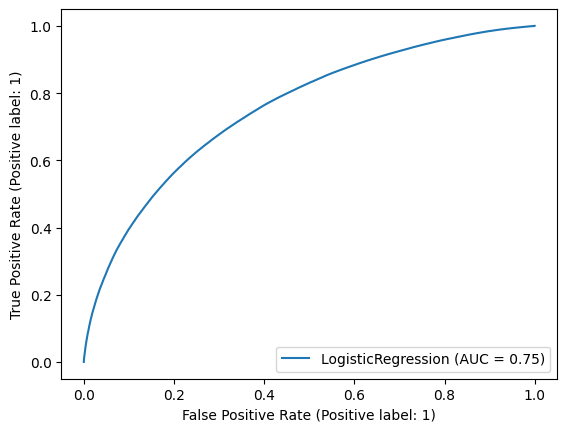

In [14]:
RocCurveDisplay.from_estimator(
    estimator=baseline_logreg,
    X=X_train_buy_post,
    y=y_train_buy_post
)

In [ ]:
f1_score(
    y_pred=baseline_logreg_cv.predict(X_test_buy_post),
    y_true=y_test_buy_post
)

0.8865249613081096

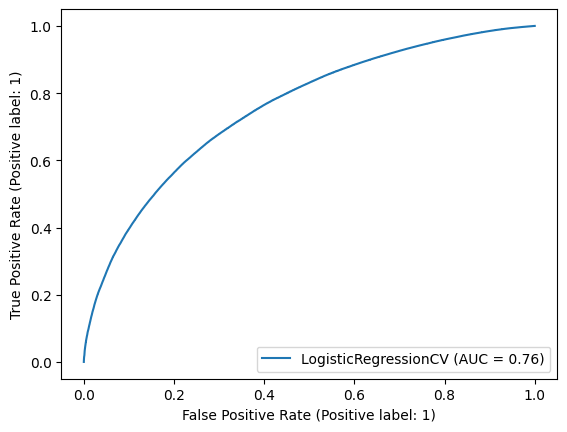

In [ ]:
RocCurveDisplay.from_estimator(
    estimator=baseline_logreg_cv,
    X=X_train_buy_post,
    y=y_train_buy_post
)

### Обучим дерево

In [106]:
baseline_tree = DecisionTreeClassifier(max_depth=10, class_weight='balanced', random_state=21)

In [107]:
baseline_tree.fit(
    X=X_train_buy_post,
    y=y_train_buy_post
)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, random_state=21)

In [17]:
f1_score(
    y_pred=baseline_tree.predict(X_test_buy_post),
    y_true=y_test_buy_post
)

0.7544818754925139

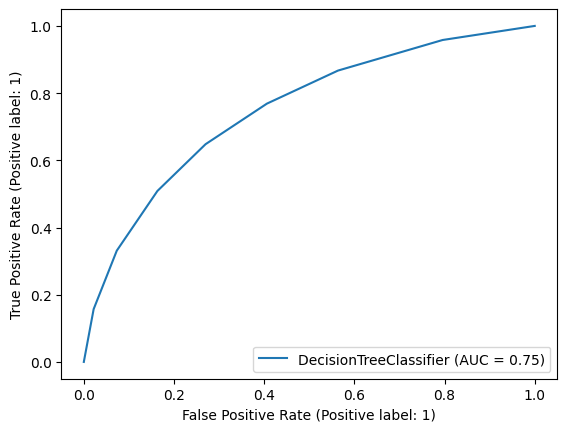

In [18]:
RocCurveDisplay.from_estimator(
    estimator=baseline_tree,
    X=X_train_buy_post,
    y=y_train_buy_post
)

In [19]:
baseline_tree.predict_proba(X=X_train_buy_post)

array([[0.7182702 , 0.2817298 ],
       [0.7182702 , 0.2817298 ],
       [0.61575124, 0.38424876],
       ...,
       [0.529804  , 0.470196  ],
       [0.82981565, 0.17018435],
       [0.43412438, 0.56587562]])

### Случайный лес

In [108]:
forest = RandomForestClassifier(max_depth=10, class_weight='balanced', random_state=21)

In [109]:
forest.fit(
    X=X_train_buy_post,
    y=y_train_buy_post
)

RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=21)

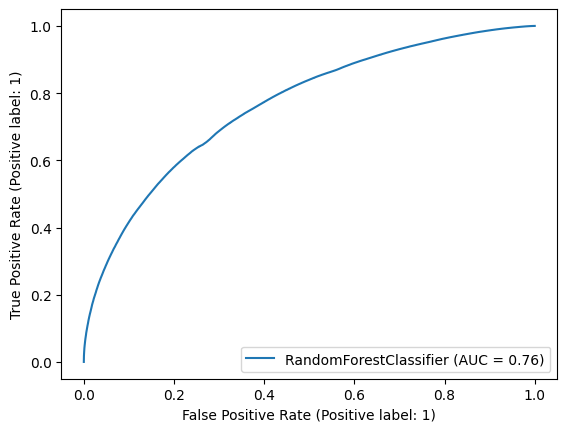

In [110]:
RocCurveDisplay.from_estimator(
    estimator=forest,
    X=X_train_buy_post,
    y=y_train_buy_post
)

In [111]:
f1_score(
    y_pred=baseline_tree.predict(X_test_buy_post),
    y_true=y_test_buy_post
)

0.7650295272818075

In [112]:
forest.predict_proba(X=X_train_buy_post)

array([[0.71856985, 0.28143015],
       [0.71631663, 0.28368337],
       [0.70895208, 0.29104792],
       ...,
       [0.5277163 , 0.4722837 ],
       [0.83417497, 0.16582503],
       [0.38101373, 0.61898627]])

In [ ]:
cross_val_score(
    estimator=forest,
    X=X_train_buy_post,
    y=y_train_buy_post,
    cv=4
)

array([0.79585822, 0.79585615, 0.79585615, 0.79585615])

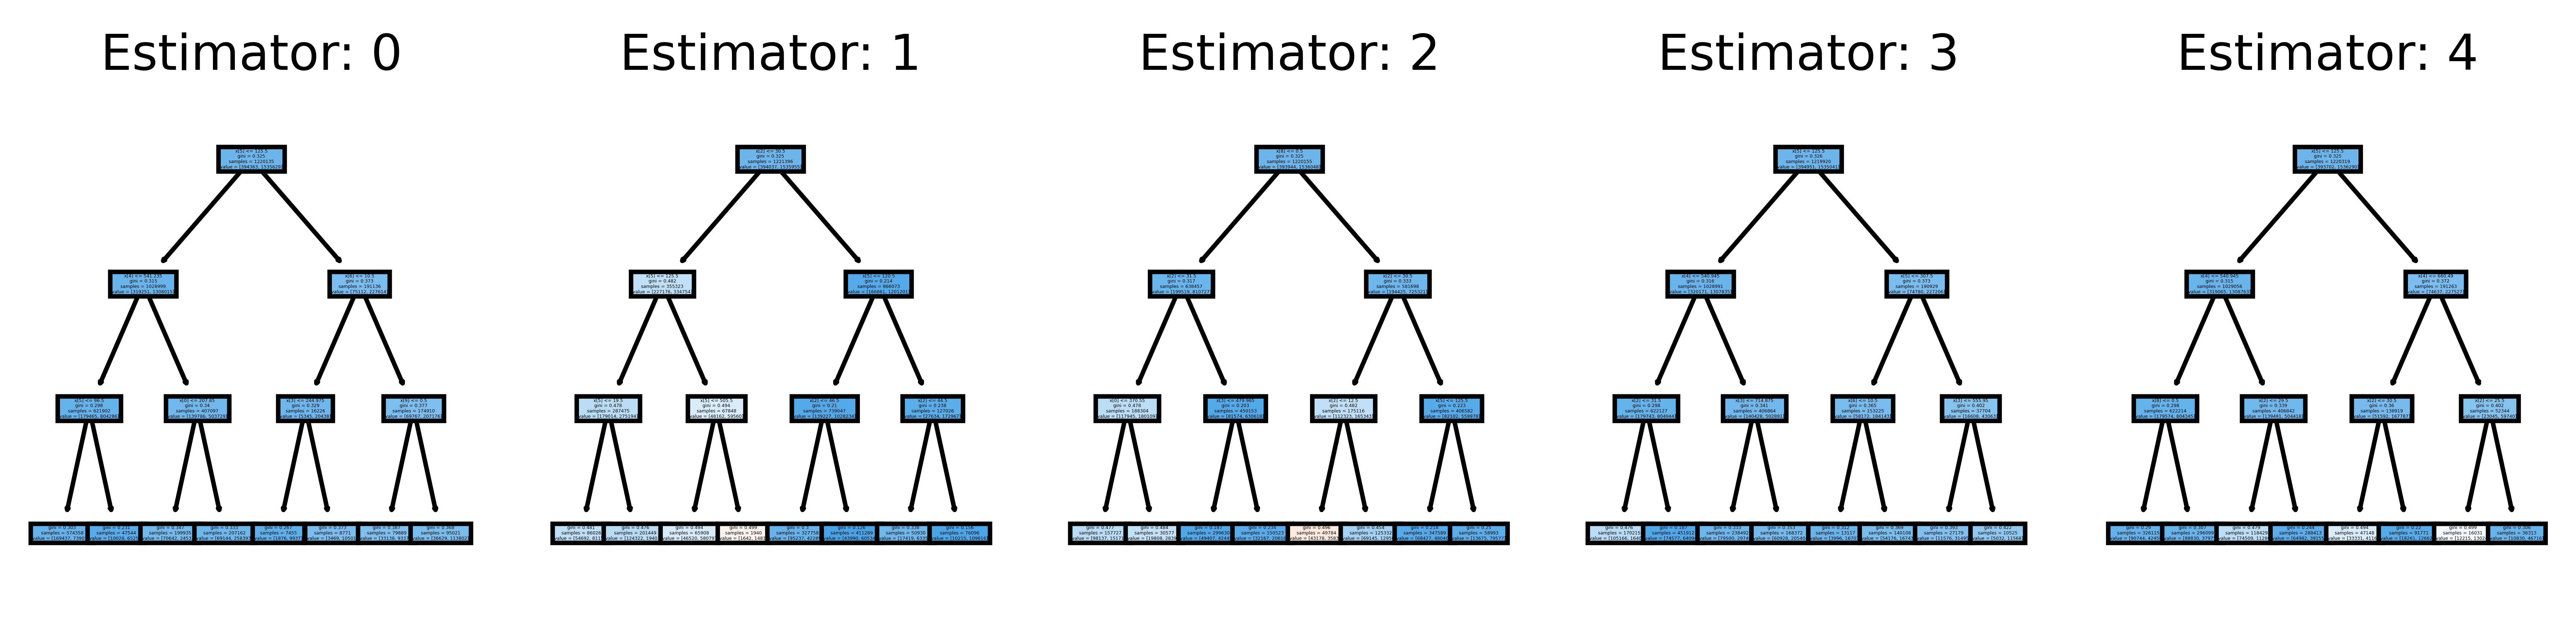

In [89]:
fn=X_buy_post.columns
cn=y_buy_post
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    plot_tree(forest.estimators_[index],
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)

In [ ]:
# kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# results = cross_val_score(estimator=forest,
#                                           X=X_train_buy_post,
#                                           y=y_train_buy_post,
#                                           cv=kfold,
#                                           scoring='f1_micro')


KeyboardInterrupt: 

### Рассмотрим алгоритм градиентного бустинга

In [20]:
gd_baseline = GradientBoostingClassifier(random_state=21)

In [21]:
gd_baseline.fit(
    X=X_train_buy_post,
    y=y_train_buy_post
)

GradientBoostingClassifier(random_state=21)

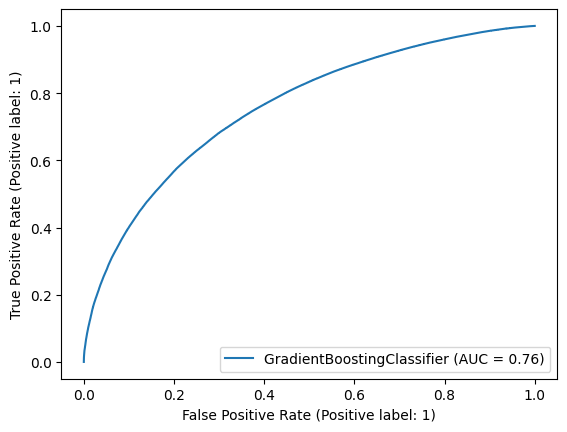

In [22]:
RocCurveDisplay.from_estimator(
    estimator=gd_baseline,
    X=X_train_buy_post,
    y=y_train_buy_post
)

In [23]:
f1_score(
    y_pred=gd_baseline.predict(X_test_buy_post),
    y_true=y_test_buy_post
)

0.8886307462373296

### Посмотрим score на кросс-валидации

In [30]:
cross_val_score(
    estimator=gd_baseline,
    X=X_train_buy_post,
    y=y_train_buy_post,
    cv=5
)

array([0.80494768, 0.80553836, 0.80565443, 0.80522179, 0.80575029])

### Теперь предскажем вторую целевую переменную - date_diff_post

In [113]:
X_diff_post, y_diff_post = train.drop(['buy_post', 'startdatetime', 'customer_id', 'date_diff_post'], axis=1), train['date_diff_post']

In [114]:
X_diff_post

,ownareaall_sqm,format_name,MaxMinDelta,OrderPrice,MeanOrderPrice,FavoriteDish,hour,minute,is_food_court,is_toilet
0,300.0,0,57,389.97,230.39,9,12,3,0,1
1,300.0,0,57,119.99,230.39,9,14,28,0,1
2,463.0,1,57,269.99,230.39,9,0,37,0,1
3,463.0,1,57,144.97,230.39,9,9,20,0,1
4,463.0,1,57,184.96,230.39,9,9,46,0,1
...,...,...,...,...,...,...,...,...,...,...
2880581,270.0,1,0,179.99,454.97,465,14,4,0,1
2880582,270.0,1,0,569.98,454.97,465,18,15,0,1
2880583,300.0,4,0,259.99,281.97,29,17,50,1,1
2880584,300.0,4,0,284.97,281.97,29,18,1,1,1


In [115]:
X_train_diff_post, X_test_diff_post, y_train_diff_post, y_test_diff_post = train_test_split(
    X_buy_post, y_buy_post,
    test_size=0.33,
    shuffle=True,
    random_state=66
)

In [116]:
forest_regressor = RandomForestRegressor(max_depth=10, random_state=55)

In [117]:
forest_regressor.fit(
    X=X_train_diff_post,
    y=y_train_diff_post
)

RandomForestRegressor(max_depth=10, random_state=55)

### Посчитаем ошибки

In [118]:
mse = mean_squared_error(
    y_pred=forest_regressor.predict(X_test_diff_post),
    y_true=y_test_diff_post
)

mse

0.13753717980559194

In [119]:
rmse = mse ** 0.5

rmse

0.37086005420588497

In [121]:
forest_regressor.feature_importances_

array([1.12073361e-02, 2.61271243e-03, 9.20707794e-01, 2.84022154e-03,
       3.78679814e-02, 1.93886355e-02, 2.98450720e-03, 1.69231120e-03,
       2.85173310e-04, 4.13326894e-04])